In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def load_housing_data(csv='../datasets/housing.csv'):
    return pd.read_csv(csv)
    

In [3]:
housing_df = load_housing_data()
housing_df.head()
#housing_df.sort_values(by = 'median_house_value', ascending = False, inplace = True)
#grouped_by_ocean = housing_df.groupby(by='ocean_proximity', axis = 0).count()
#grouped_by_ocean[['longitude']].plot(kind = 'bar', title= 'Proprty count')
#plt.show()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Points about histogram data -

* Median Housing income is scalled from 0.5 to 15 and hence not in thousands of $$
* Median value is also capped at 500K. 
* Feature scaling will be needed as attributes are in different scales.
* Transformation of data will be needed to make it more of a bell shaped than tail shaped


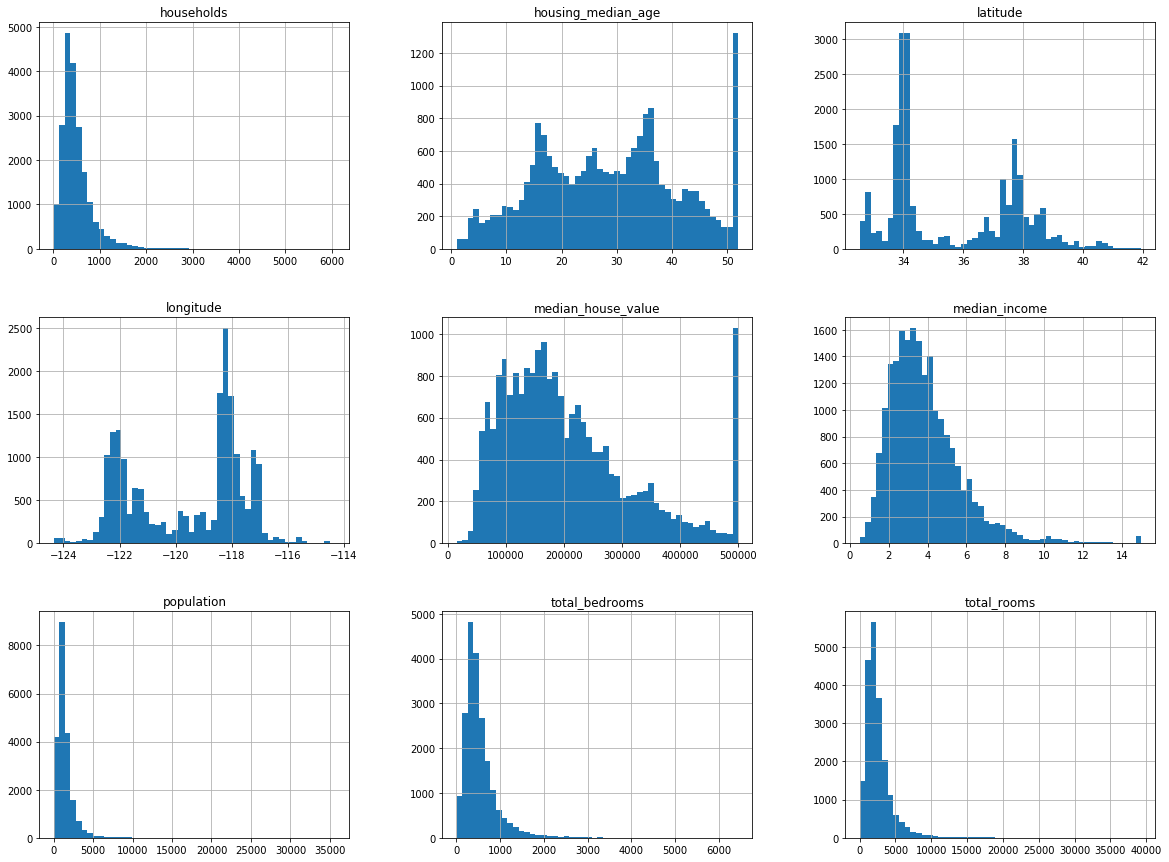

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize = (20,15))
plt.show()

## Splitting into Test and Train Set
* data snooping bias -- Attempt to fit the alogorithm by looking at the pattern of data.
* Random Sampling vs Stratified Sampling


In [8]:
import numpy as np

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices =  np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices =  shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing_df, 0.2)
print(len(train_set), " train + ", len(test_set), " test")

16512  train +  4128  test


In [11]:
housing_df["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [12]:
housing_df["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
3.8750     41
3.0000     38
3.3750     38
3.6250     37
4.0000     37
4.3750     35
2.1250     33
2.3750     32
4.6250     31
3.5000     30
3.2500     29
3.7500     29
4.8750     29
1.6250     29
2.2500     29
4.2500     28
2.5000     28
3.6875     26
2.7500     25
4.5000     24
2.5625     21
1.8750     21
5.0000     20
3.0625     19
4.4375     18
           ..
5.7780      1
1.3672      1
4.6420      1
2.5389      1
6.2113      1
2.1975      1
6.0591      1
2.1403      1
1.5161      1
4.0037      1
1.9306      1
4.0517      1
3.5082      1
5.2649      1
6.7744      1
4.0677      1
2.1216      1
4.1449      1
6.0808      1
5.6263      1
4.8283      1
2.5599      1
7.3031      1
2.7209      1
2.1630      1
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [13]:
housing_df["income_cat"] = np.ceil(housing_df["median_income"]/1.5)
housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace =  True)

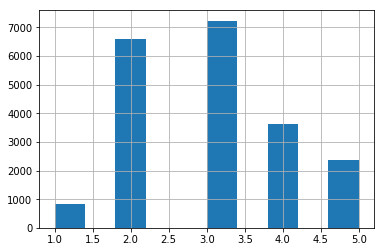

In [14]:
housing_df["income_cat"].hist()
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

In [16]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis =  1, inplace =  True)


In [17]:
housing_df = strat_train_set.copy()

## Gain Insight from Visualization

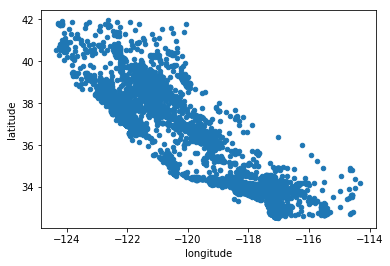

In [18]:
housing_df.plot(kind = "scatter", x = "longitude", y = "latitude")
plt.show()

Setting `alpha` to `0.1` helps visualize the density of the population

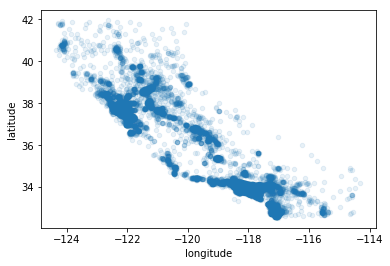

In [19]:
housing_df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)
plt.show()

Need some clarification on the parameters used in map call below.

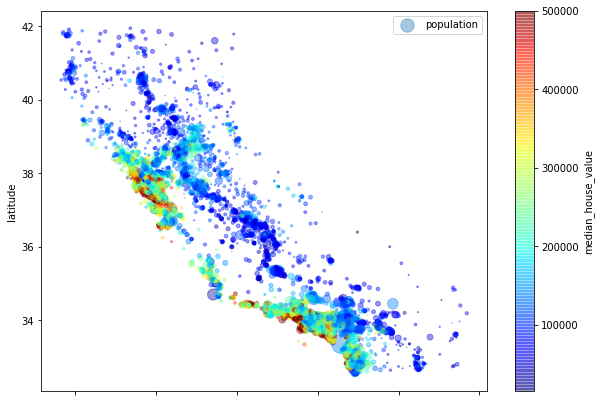

In [20]:
housing_df.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.4, 
                s = housing_df["population"]/100, label = "population", figsize = (10,7), 
                c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)

### Looking for correlation among attributes
* Question - What are different types of coorelation apart from Pearson correlation.


In [21]:
corr_matrix = housing_df.corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [23]:
import folium

In [24]:
map = folium.Map(location=[housing_df['latitude'].mean(), housing_df['longitude'].mean()], zoom_start=6)
i = 0
for lat, lng, value in zip(housing_df['latitude'], housing_df['longitude'], housing_df['median_house_value']):
    i = i + 1
    if i < 1400:
        folium.CircleMarker(
        [lat, lng],
        popup = str(value),
        radius=2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map)
map

In [25]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


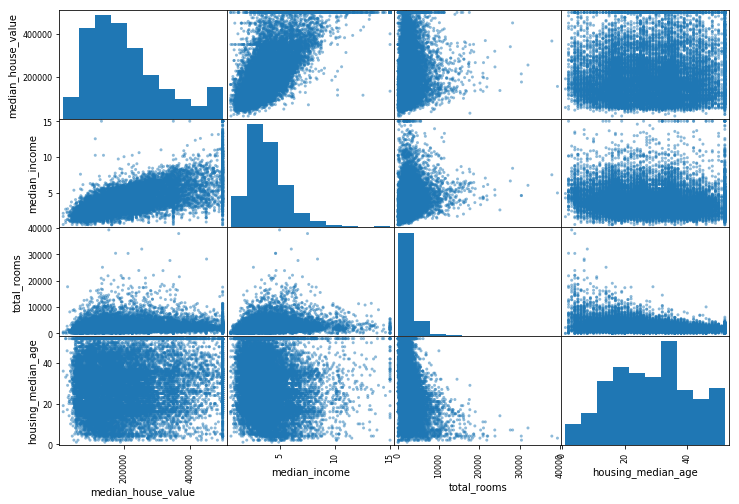

In [26]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing_df[attributes], figsize=(12,8))
plt.show()

### Median Income vs median house value correlation
Notice the horizontal lines @500K, 450K, 350K and also around 280K

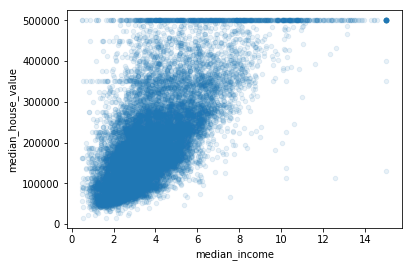

In [27]:
housing_df.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.show()

### Experimenting with attribute combinations
Create additional interesting attributes such as -
* Number of bedrooms compared to number of rooms
* Population per households
* Rooms per households

In [28]:
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

In [29]:
corr_matrix = housing_df.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64